## Exercise 5

In [4]:
### NEEDED PACKAGES #### --------------------------------
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse as sp
from sklearn.linear_model import Lasso, lasso_path
from sklearn.metrics import mean_squared_error
% matplotlib inline


## Set-up

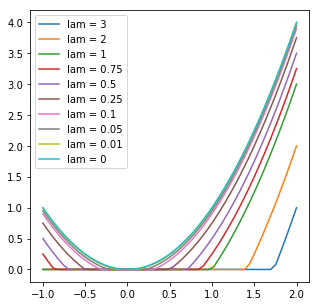

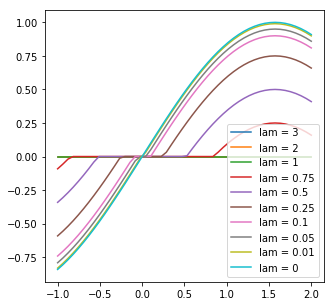

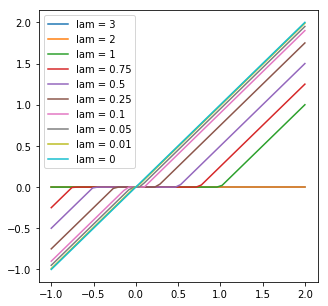

In [25]:
#### PART A #### ----------------------------------------
def soft_thresh(y, lam):
	""" soft thresholding formula from exercise 5"""
	return np.sign(y) * np.maximum((np.abs(y) - lam), np.zeros(y.shape[0]))


# def hard_thresh(y, lam):
# 	""" soft thresholding formula from exercise 5"""
# 	# y if y is > lam, 0 otherwise. 
# 	return


X  = np.linspace(-1, 2, 50) 
y1 = X**2
y2 = np.sin(X)
y3 = np.linspace(-1, 2, 50)


lam_parm = [3, 2, 1, 0.75, 0.5, 0.25, 0.10, 0.05, 0.01, 0]

fig1 = plt.figure( 1, figsize=(5,5) )
for i in lam_parm:
	plt.plot( X, soft_thresh(y1, i), label="lam = %s"%str(i) )
	plt.legend(loc='best')

fig2 = plt.figure( 2, figsize=(5,5) )
for i in lam_parm:
	plt.plot( X, soft_thresh(y2, i), label="lam = %s"%str(i) )
	plt.legend(loc='best')

fig3 = plt.figure( 3, figsize=(5,5) )
for i in lam_parm:
	plt.plot( X, soft_thresh(y3, i), label="lam = %s"%str(i) )
	plt.legend(loc='best')


## Describe Previous and Set-up Next

..
..
..


In [26]:
sparsity = [0.05, 0.1, 0.2, 0.3, 0.6]
p        = 40
theta    = sp.rand(1, p, density=sparsity[2], format='csr')
variance = np.random.rand( p )**2
#variance = np.ones( (1, p) )


##-- 2. simulate 1 data point --
def draw_y( theta, variance ):
	""" uhhh """
	# index our non-zero theta parameters
	index = theta.indices
	# when we take draws for y from a gaussian, they should be 
	# scled by the predetermined variances we defined above - numpy
	# takes stdev as input, not the variance.  
	stdev = np.sqrt( variance )
	y     = np.random.normal(scale = stdev)
	# we can now draw from a random normal distribution, scaled by the 
	# variance we defined above. 
	y[index] = np.random.normal(loc = theta.data, scale = stdev[index] )
	return y

y = draw_y( theta, variance )


## Describe Previous and Set-up Next

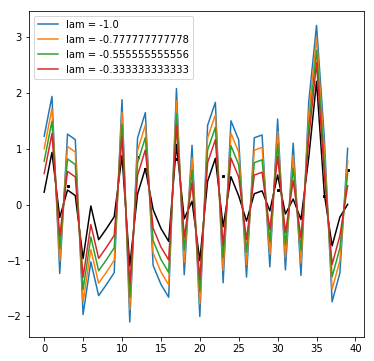

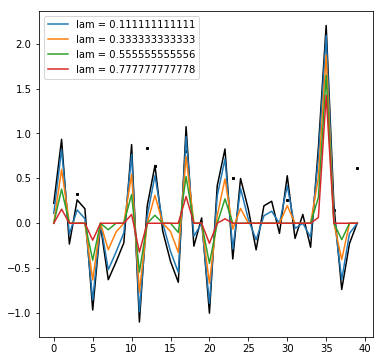

In [27]:
##-- 3. plot soft threshold of y vs. y --

# simulated data point
y   = draw_y( theta, variance )

# varying lambdas
lam_parm = np.linspace(-1, 1, 10)

# plot comparison
fig = plt.figure( 1, figsize=(6,6) )
plt.plot( y, c='k' )
for i in lam_parm[0:4]:
	threshhold = soft_thresh( y, i )
	plt.plot( threshhold, label="lam = %s"%str(i)  )
	plt.scatter(theta.indices, theta.data, marker='o', c='k', s=3 )
	plt.legend(loc="best")

fig = plt.figure( 2, figsize=(6,6) )
plt.plot( y, c='k' )
for i in lam_parm[5:9]:
	threshhold = soft_thresh( y, i )
	plt.plot( threshhold, label="lam = %s"%str(i)  )
	plt.scatter(theta.indices, theta.data, marker='o', c='k', s=3 )
	plt.legend(loc="best")


## Describe Previous and Set-up Next


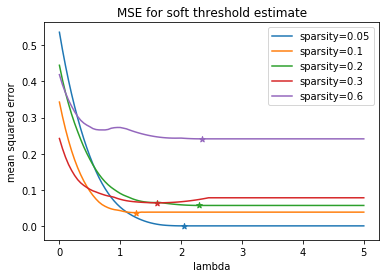

In [28]:
##-- 4. plot MSE of estimate as a function of lambda --
p = 50
lam_parm = np.linspace( 0, 5, 101 )
MSEs = np.zeros( len( lam_parm ) )
variance = np.random.rand(p)**2
sparsity = [0.05, 0.1, 0.2, 0.3, 0.6]

# generate data with different levels of sparsity
for sps in sparsity:
    theta = sp.rand(1,p, density=sps, format='csr')
    y = draw_y(theta, variance)
    # calculate the MSE for different lambda values
    # for each of the different sparsities and plot
    for i, lam_val in enumerate(lam_parm):
        threshhold = soft_thresh(y, lam_val)
        MSEs[i] = 1. / p * np.sum( np.square( threshhold - theta ) )
    # plot the minimum of the MSE
    argmin = np.argmin( MSEs )
    plt.scatter( lam_parm[argmin], MSEs[argmin], marker='*' )
    # plot the MSE
    plt.plot( lam_parm, MSEs, label="sparsity=%s"%str( sps ) )

# interpret the plot!!
plt.xlabel('lambda')
plt.ylabel('mean squared error')
plt.legend(loc='best')
plt.title('MSE for soft threshold estimate')

## Describe Previous and Set-up Next

## The Lasso

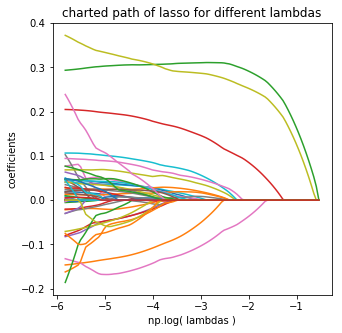

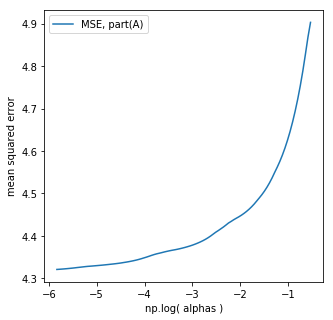

In [29]:
#### PART B #### ----------------------------------------

#### The Lasso #### -------------------------------------

## -- load data --
# Download the data on diabetes progression in 442 adults
X  = np.loadtxt('diabetesX.csv', skiprows=1, delimiter=',')
XX = X.copy()
y  = np.loadtxt('diabetesY.csv')
X  /= X.std(axis=0)
yy = y/y.std()

## -- (A) Fit Lasso to some data using a range of lambda values --
eps = 5e-3  # the smaller it is the longer is the path

# lasso_path function goes through a set of lambdas
alphas, coefs, _ = lasso_path( X, yy, eps=eps, fit_intercept=False, positive=False )
alphas1, coefs1, _1 = lasso_path( X, y, eps=eps, fit_intercept=False, positive=False )

# plot
fig1 = plt.figure( 1, figsize=(5,5) )
for c in coefs:
    plt.plot( np.log( alphas ), c )

plt.xlabel('np.log( lambdas )')
plt.ylabel('coefficients')
plt.title('charted path of lasso for different lambdas')

# check the MSE of the estimates
errs = yy - np.dot( X, coefs ).T
MSEs = 1. / yy.shape[0] * (np.linalg.norm( errs, axis=1 )**2)

# check according to sklearn mean_squared_error function
mse_out=[]
for i in np.arange(0,100):
	mse_out.append( mean_squared_error(yy, np.dot( X, coefs[:,i].T ) ) )

fig2 = plt.figure( 2, figsize=(5,5) )
plt.plot( np.log( alphas ), MSEs, label="MSE, part(A)" )
plt.xlabel('np.log( alphas )')
plt.ylabel('mean squared error')
plt.legend(loc="best")


## Describe Previous and Set-up Next

In [30]:
## -- (B) Determine lambda using cross-valdiation on the data --

# cross-validation function
def ttr_vecs(N, folds=10):
	"""
	Input: N     = number of observations in dataset
		   folds = the number of folds desired for cross-validation 
	Output: python dictionary of numpy arrays indexing training and 
	testing sets across folds
	"""

	# generate training set size 
	test_size  = round( N/folds )
	indexer    = np.arange(0,N)

	# initialized for loop variables
	start=0; stop=test_size; indexes=[];

	# this divides data into 'folds'
	for fd in np.arange(0,folds):
		if fd==(folds-1):
			indexes.append( indexer[start:] )
		else:
			indexes.append( indexer[start:stop] )
			start+=test_size
			stop+=test_size

	# groups the subdivided data into training and testing sets. 
	split={}; fd=0;
	for f in np.arange(0, folds):
		ind_cp = indexes.copy()
		test   = ind_cp.pop(f)
		train  = np.concatenate( ind_cp )
		split[f]={ "test": test, "train":train }

	return split

## Describe

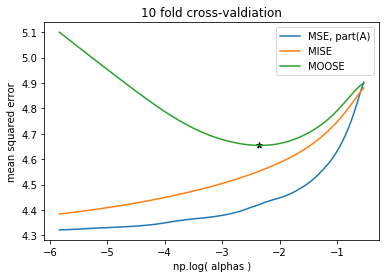

In [32]:
N   = len( X[:,0] )
P   = len( X[0,:] )

# shuffle data but keep track of indices (used during cross validation)
sh  = np.random.permutation( N )
X   = X[sh,:]
yy  = yy[sh]

# n folds and cv
folds = 10
split = ttr_vecs( N, folds=folds )

## -- (C) Collin Mallows method instead of cross validation --
# within cv tracking 
in_MSEs      = []
out_MSEs     = []

# lambda tracking
avg_MSE_out  = []
avg_MSE_in   = [] 
avg_coefs_in = []

# use vector of alphas from part A.
for a in alphas:
	coefs_vec = []
	for f in np.arange( 0, folds ):
		# train on data with held-out test example
		train_x  = X[ split[f]['train'], : ]
		train_y  = yy[ split[f]['train'] ]
		
		# test it out
		test_x  = X[ split[f]['test'], : ]
		test_y  = yy[ split[f]['test'] ]
		
		# run it
		tr_lasso = Lasso( alpha=a, fit_intercept=False )
		tr_lasso.fit( train_x, train_y )
		coefs_vec.append( tr_lasso.coef_ )
		
		# within sample estimates
		in_err = train_y - np.dot( train_x, tr_lasso.coef_.T )
		in_MSE = 1. / train_y.shape[0] * ( np.linalg.norm( in_err, axis=0 ) )**2
		in_MSEs.append( in_MSE )
		
		# out of sample estimates
		out_err  = test_y - np.dot( test_x, tr_lasso.coef_.T )
		out_MSE = 1. / test_y.shape[0] * ( np.linalg.norm( out_err, axis=0 ) )**2
		out_MSEs.append( out_MSE )

	# collect the average of cv
	avg_coefs_in.append( np.array( coefs_vec ).mean(axis=0) )
	avg_MSE_in.append( np.array( in_MSEs ).mean() )
	avg_MSE_out.append( np.array( out_MSEs ).mean() )

# plot
argmin=np.argmin(avg_MSE_out)
plt.scatter( np.log( alphas[argmin] ), avg_MSE_out[argmin], marker='*', s=35, c='k' )
# from part A
plt.plot( np.log( alphas ), MSEs, label="MSE, part(A)" )
# within sample
plt.plot( np.log( alphas ), avg_MSE_in, label="MISE" )
# out of sample
plt.plot( np.log( alphas ), avg_MSE_out, label="MOOSE " )
# what are we looking at?
plt.title("%d fold cross-valdiation"%folds)
plt.xlabel('np.log( alphas )')
plt.ylabel('mean squared error')
plt.legend(loc="best")

## Describe Previous and Set-up Next

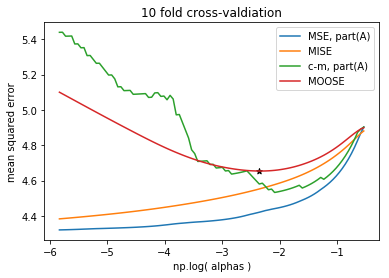

In [34]:
## -- (C) Collin Mallows method instead of cross validation --
# within cv tracking 
in_MSEs      = []
out_MSEs     = []

# lambda tracking
avg_MSE_out  = []
avg_MSE_in   = [] 
avg_coefs_in = []

# use vector of alphas from part A.
for a in alphas:
	coefs_vec = []
	for f in np.arange( 0, folds ):
		# train on data with held-out test example
		train_x  = X[ split[f]['train'], : ]
		train_y  = yy[ split[f]['train'] ]
		
		# test it out
		test_x  = X[ split[f]['test'], : ]
		test_y  = yy[ split[f]['test'] ]
		
		# run it
		tr_lasso = Lasso( alpha=a, fit_intercept=False )
		tr_lasso.fit( train_x, train_y )
		coefs_vec.append( tr_lasso.coef_ )
		
		# within sample estimates
		in_err = train_y - np.dot( train_x, tr_lasso.coef_.T )
		in_MSE = 1. / train_y.shape[0] * ( np.linalg.norm( in_err, axis=0 ) )**2
		in_MSEs.append( in_MSE )
		
		# out of sample estimates
		out_err  = test_y - np.dot( test_x, tr_lasso.coef_.T )
		out_MSE = 1. / test_y.shape[0] * ( np.linalg.norm( out_err, axis=0 ) )**2
		out_MSEs.append( out_MSE )

	# collect the average of cv
	avg_coefs_in.append( np.array( coefs_vec ).mean(axis=0) )
	avg_MSE_in.append( np.array( in_MSEs ).mean() )
	avg_MSE_out.append( np.array( out_MSEs ).mean() )

##-- collin mallows --

# degrees of freedom in model
df=(N-P)

# least squares fit of model
b, res, _, _ = np.linalg.lstsq( X, yy )

# c-m for MSE used on our data without cv (1) and used on data with cv (2)
s_lam_all = np.array( [ 2*(abs(coefs[:,i])>1e-8).sum() for i in np.arange(0,len(alphas)) ] )
Cp_all = MSEs + ( s_lam_all * (1/df) * res) / N

# visualization
argmin=np.argmin(avg_MSE_out)
plt.scatter( np.log( alphas[argmin] ), avg_MSE_out[argmin], marker='*', s=35, c='k' )
plt.plot( np.log( alphas ), MSEs, label="MSE, part(A)" )
plt.plot( np.log( alphas ), avg_MSE_in, label="MISE" )
plt.plot( np.log( alphas ), Cp_all, label="c-m, part(A)" )
plt.plot( np.log( alphas ), avg_MSE_out, label="MOOSE " )
plt.title("%d fold cross-valdiation"%folds)
plt.xlabel('np.log( alphas )')
plt.ylabel('mean squared error')
plt.legend(loc="best")

## Describe